## Introduction
- We'll explore web scraping, sentiment analysis, and readability analysis on a collection of articles.
- The goal is to extract articles from given URLs, analyze their sentiment and readability, and compile the results into a structured DataFrame.
- This process involves various steps, including web scraping using BeautifulSoup, text analysis using Natural Language Toolkit (NLTK), and DataFrame manipulation with pandas.

 **Web Scraping:**

- The code starts by importing necessary libraries, including BeautifulSoup, pandas, numpy, and requests.
- It sets up a URL for web scraping and requests the webpage content using the requests.get() function.
- BeautifulSoup is used to parse the webpage content, extracting article titles and contents.
- The extracted titles and contents are stored in separate lists and then combined into a DataFrame.

In [1]:
from bs4 import BeautifulSoup
from csv import writer
import time
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

**Reading URLs from CSV:**
- URLs are read from a CSV file (Input.csv) using pandas' read_csv() function.
- These URLs are then iterated through for web scraping to collect article data.

In [2]:
# referencing the url
url = 'https://insights.blackcoffer.com/rising-it-cities-and-its-impact-on-the-economy-environment-infrastructure-and-city-life-by-the-year-2040-2/'
#requesting web page from url
web_page = requests.get(url)
#using BeautifulSoup for data extraction from web page in html form
samosa = BeautifulSoup(web_page.content, 'html.parser')
#creating list for storing the title of the web page
new_list = []
for link in samosa.find_all(class_="td-post-title"):
    article_title = link.find('h1' ,class_="entry-title").get_text()
    new_list.append([article_title])
#creating list for storing the content of the web page
new_list2 = []
link = samosa.find_all('div', class_="td-post-content tagdiv-type")

for article in link:
    for paragraph in article.find_all('p'):
        article_content = paragraph.get_text()
        new_list2.append([article_content])

# adding all the paragraphs extracted as one using arrays in a list
arr_list = [np.array(new_list2)]

# Concatenate arrays into a single array with line separator
sep = '\n'
concatenated_arr = np.concatenate(arr_list)
result = sep.join(str(val) for val in concatenated_arr)
#creating Dataframe of title and content combined
article_text = pd.DataFrame({'title': new_list, 'content': result})

print(article_text)

                                               title  \
0  [Rising IT cities and its impact on the econom...   

                                             content  
0  ['We have seen a huge development and dependen...  


In [3]:
url_df = pd.read_csv("Input.csv", sep=",")

In [4]:
url_df

,URL_ID,URL
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...
...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...


In [5]:
url_list = url_df['URL'].tolist()

In [6]:
url_list

['https://insights.blackcoffer.com/rising-it-cities-and-its-impact-on-the-economy-environment-infrastructure-and-city-life-by-the-year-2040-2/',
 'https://insights.blackcoffer.com/rising-it-cities-and-their-impact-on-the-economy-environment-infrastructure-and-city-life-in-future/',
 'https://insights.blackcoffer.com/internet-demands-evolution-communication-impact-and-2035s-alternative-pathways/',
 'https://insights.blackcoffer.com/rise-of-cybercrime-and-its-effect-in-upcoming-future/',
 'https://insights.blackcoffer.com/ott-platform-and-its-impact-on-the-entertainment-industry-in-future/',
 'https://insights.blackcoffer.com/the-rise-of-the-ott-platform-and-its-impact-on-the-entertainment-industry-by-2040/',
 'https://insights.blackcoffer.com/rise-of-cyber-crime-and-its-effects/',
 'https://insights.blackcoffer.com/rise-of-internet-demand-and-its-impact-on-communications-and-alternatives-by-the-year-2035-2/',
 'https://insights.blackcoffer.com/rise-of-cybercrime-and-its-effect-by-the-ye

In [7]:
#creating a master dataframe
article_with_content = pd.DataFrame()
#creating for loop for performing same task for all the urls in url_list
for url in url_list:
    #request web_page from the current url
    web_page = requests.get(url)
    #saving content of the web_page in samosa variable
    samosa = BeautifulSoup(web_page.content, 'html.parser')
    #creating the list for storing the title of the web_pages
    new_list = []
    for link in samosa.find_all(class_="td-post-title"):
        article_title = link.find('h1' ,class_="entry-title").get_text()
        new_list.append([article_title])
    #if there no output from the for loop we will add 'web error' as error massage as there are few urls without proper web page    
    if not new_list:
        new_list.append(['web error'])
    #creating the list for storing the content of the web_pages    
    new_list2 = []
    link = samosa.find_all('div', class_="td-post-content tagdiv-type")
    for article in link:
        for paragraph in article.find_all('p'):
            article_content = paragraph.get_text()
            new_list2.append([article_content])
     #if there no output from the for loop we will add 'web error' as error massage as there are few urls without proper web page         
    if not new_list2:
        new_list2.append(['web error'])
        
    arr_list = [np.array(new_list2)]
    sep = '\n'
    concatenated_arr = np.concatenate(arr_list)
    result = sep.join(str(val) for val in concatenated_arr)
    article_text = pd.DataFrame({'title': new_list, 'content': result})
    #adding all the data to the master dataframe
    article_with_content = pd.concat([article_with_content, article_text], ignore_index=True)

In [8]:
article_with_content

,title,content
0,[Rising IT cities and its impact on the econom...,['We have seen a huge development and dependen...
1,[Rising IT Cities and Their Impact on the Econ...,"['Throughout history, from the industrial revo..."
2,"[Internet Demand’s Evolution, Communication Im...",['Introduction']\n['In the span of just a few ...
3,[Rise of Cybercrime and its Effect in upcoming...,"['The way we live, work, and communicate has u..."
4,[OTT platform and its impact on the entertainm...,['The year 2040 is poised to witness a continu...
...,...,...
95,[Due to the COVID-19 the repercussion of the e...,"['Epidemics, in general, have both direct and ..."
96,[Impact of COVID-19 pandemic on office space a...,['COVID 19 has bought the world to its knees. ...
97,[Contribution of handicrafts (Visual Arts & Li...,['Handicrafts is an art of making crafts by ha...
98,[web error],['web error']


**Sentiment Analysis:**
- NLTK's Natural Language Toolkit is used for sentiment analysis.
- Positive and negative words are loaded from text files (positive-words.txt and negative-words.txt).
- A function analyze_sentiment() is defined to analyze sentiment in the article content.
- The function calculates positive score, negative score, polarity score, and subjectivity score for each article.

In [9]:
#import libraries

import nltk

nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize

stopwords_folder = 'StopWords'

# Initialize an empty set to store stopwords
stop_words = set()

# Iterate over files in the folder
for filename in (stopwords_folder):
    if filename.endswith('.txt'):
        # Load stop words from each file and add them to the set
        with open((stopwords_folder, filename), 'r') as f:
            stop_words.update(f.read().splitlines())

# Convert the set to lowercase for case-insensitive matching
stop_words = {word.lower() for word in stop_words}

# Load positive and negative words
with open('MasterDictionary/positive-words.txt', 'r', encoding='ISO-8859-1') as f:
    positive_words = set(f.read().splitlines())
with open('MasterDictionary/negative-words.txt', 'r', encoding='ISO-8859-1') as f:
    negative_words = set(f.read().splitlines())

#creating a function for analysing the sentiments of the content    
def analyze_sentiment(text):
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Calculate positive and negative scores
    positive_score = round(sum(1 for word in words if word in positive_words),2)
    negative_score = round(sum(1 for word in words if word in negative_words),2)
    
    # Calculate polarity score
    polarity_score = round((positive_score - negative_score) / ((positive_score + negative_score) + 0.000001),2)
    
    # Calculate subjectivity score
    subjectivity_score = round((positive_score + negative_score) / (len(words) + 0.000001),2)
    
    return {
        'positive_score': positive_score,
        'negative_score': negative_score,
        'polarity_score': polarity_score,
        'subjectivity_score': subjectivity_score,
    }

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import nltk
nltk.download('cmudict')

d = nltk.corpus.cmudict.dict()

def nsyl(word):
    """Return the number of syllables in an English word."""
    try:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except KeyError:
        return 0

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


**Readability Analysis:**
- Another function analyze_readability() is defined for readability analysis.
- This function calculates various readability metrics such as average sentence length, percentage of complex words, Fog Index, and average word length.
- It also counts personal pronouns and syllables per word in the text.

In [12]:
#defining the name of the function
def analyze_readability(text):
    # Tokenize text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
     # Remove stop words and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Calculate average sentence length
    avg_sentence_length = round(len(words) / len(sentences),2)
    
    # Calculate percentage of complex words (words with 3 or more syllables)
    complex_words = [word for word in words if nsyl(word) >= 3]
    percentage_complex_words = round(len(complex_words) / len(words),2)
    
    # Calculate Fog Index
    fog_index = round(0.4 * (avg_sentence_length + percentage_complex_words),2)
    
    # Average number of words per sentence
    avg_word_per_sentence = round(len(words) / len(sentences),2)
    
    #number of complex words in article
    complex_word_count = round(len(complex_words),2)
    
    # Calculate total number of cleaned words
    total_words = len(words)
    
     # Calculate syllable count per word
    syllable_count_per_word = round(sum([nsyl(word) for word in words])/len([nsyl(word) for word in words]),2)
    
    # Average word length
    avg_word_length = round(sum(len(word) for word in words) / len(words),2)

    # Personal pronouns
    personal_pronouns = round(sum(1 for word in words if word.lower() in {'i', 'we', 'my', 'ours', 'us'} and word.lower() != 'us'),2)

    return {
        'avg_sentence_length': avg_sentence_length,
        'percentage_complex_words': percentage_complex_words,
        'fog_index': fog_index,
        'avg_word_per_sentence': avg_word_per_sentence,
        'complex_word_count':complex_word_count,
        'total_words':total_words,
        'syllable_count_per_word':syllable_count_per_word,
        'personal_pronouns': personal_pronouns,
        'avg_word_length': avg_word_length
    }

**Data Processing:**
- Sentiment and readability analysis are performed on each article content.
- The results are combined into a list of dictionaries, where each dictionary represents analysis metrics for a single article.
- These dictionaries are then used to create a DataFrame (df_final) combining URLs and analysis metrics.

In [13]:
content_list = article_with_content['content'].tolist()

In [14]:
analysis_list = []
i = 0
#using indexing for refering each content in iterations
while i <= 99: #number of the rows of content 
    analysis_result = analyze_sentiment(content_list[i])
    analysis_result2 = analyze_readability(content_list[i])
    analysis_list.append([analysis_result, analysis_result2])
    i += 1

In [15]:
# analysis_list

In [16]:
dict_list = []
for sublist in analysis_list:
    pos_dict = sublist[0]
    text_dict = sublist[1]
    dict_list.append({**pos_dict, **text_dict})

# create the DataFrame
df_analysis = pd.DataFrame(dict_list)

In [17]:
df_analysis

,positive_score,negative_score,polarity_score,subjectivity_score,avg_sentence_length,percentage_complex_words,fog_index,avg_word_per_sentence,complex_word_count,total_words,syllable_count_per_word,personal_pronouns,avg_word_length
0,8,1,0.78,0.03,13.78,0.12,5.56,13.78,39,317,1.50,2,4.50
1,59,31,0.31,0.07,17.96,0.23,7.28,17.96,318,1365,1.83,3,5.39
2,39,23,0.26,0.06,18.12,0.32,7.38,18.12,320,1015,2.04,12,6.05
3,37,71,-0.31,0.11,19.65,0.26,7.96,19.65,264,1002,1.85,5,5.90
4,22,8,0.47,0.05,16.97,0.21,6.87,16.97,137,645,1.77,6,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,55,-0.31,0.08,21.92,0.21,8.85,21.92,223,1074,1.72,1,5.18
96,31,34,-0.05,0.06,29.25,0.14,11.76,29.25,150,1053,1.52,4,4.61
97,1,0,1.00,0.01,26.60,0.25,10.74,26.60,33,133,1.74,0,5.26
98,0,1,-1.00,1.00,1.00,0.00,0.40,1.00,0,1,2.00,0,5.00


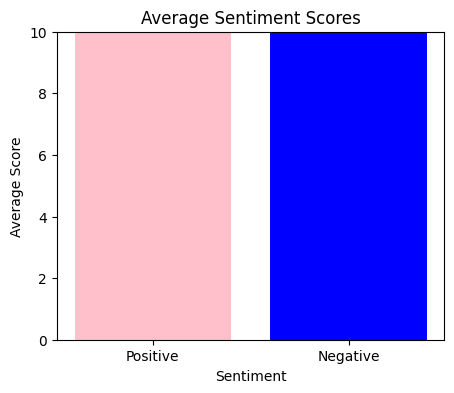

In [18]:
# After sentiment analysis loop
# Visualize sentiment scores
plt.figure(figsize=(5, 4))

# Plot positive and negative scores
plt.bar(['Positive', 'Negative'], [df_analysis['positive_score'].mean(), df_analysis['negative_score'].mean()],
        color=['pink', 'blue'])
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 10)
plt.show()


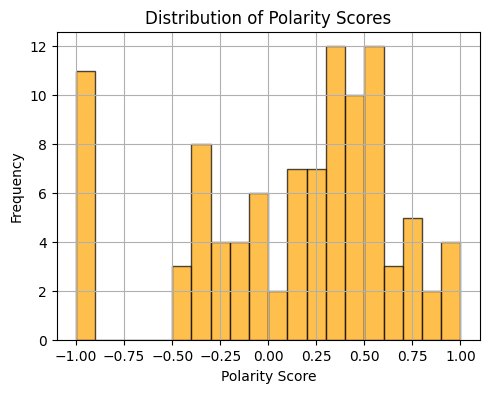

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df_analysis['polarity_score'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)

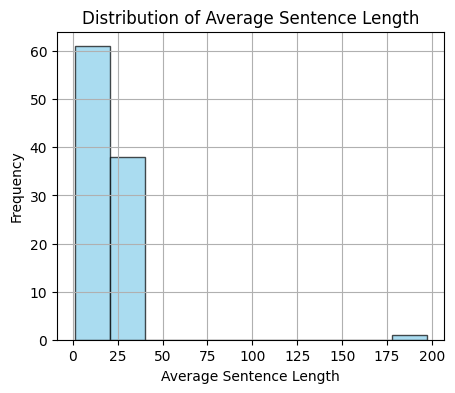

In [20]:
# After readability analysis loop
# Visualize distribution of average sentence length
plt.figure(figsize=(5, 4))
plt.hist(df_analysis['avg_sentence_length'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Sentence Length')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


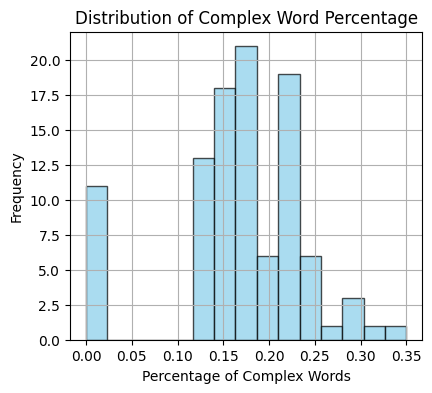

In [21]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df_analysis['percentage_complex_words'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Complex Word Percentage')
plt.xlabel('Percentage of Complex Words')
plt.ylabel('Frequency')
plt.grid(True)

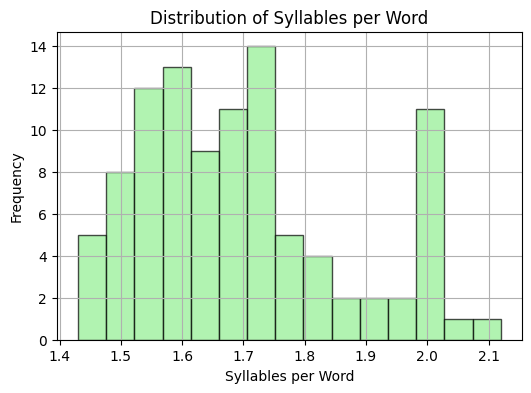

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df_analysis['syllable_count_per_word'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Syllables per Word')
plt.xlabel('Syllables per Word')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
url_list = url_df["URL"]

df_final = pd.concat([url_list, df_analysis], axis=1)

In [24]:
df_final

,URL,positive_score,negative_score,polarity_score,subjectivity_score,avg_sentence_length,percentage_complex_words,fog_index,avg_word_per_sentence,complex_word_count,total_words,syllable_count_per_word,personal_pronouns,avg_word_length
0,https://insights.blackcoffer.com/rising-it-cit...,8,1,0.78,0.03,13.78,0.12,5.56,13.78,39,317,1.50,2,4.50
1,https://insights.blackcoffer.com/rising-it-cit...,59,31,0.31,0.07,17.96,0.23,7.28,17.96,318,1365,1.83,3,5.39
2,https://insights.blackcoffer.com/internet-dema...,39,23,0.26,0.06,18.12,0.32,7.38,18.12,320,1015,2.04,12,6.05
3,https://insights.blackcoffer.com/rise-of-cyber...,37,71,-0.31,0.11,19.65,0.26,7.96,19.65,264,1002,1.85,5,5.90
4,https://insights.blackcoffer.com/ott-platform-...,22,8,0.47,0.05,16.97,0.21,6.87,16.97,137,645,1.77,6,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://insights.blackcoffer.com/what-is-the-r...,29,55,-0.31,0.08,21.92,0.21,8.85,21.92,223,1074,1.72,1,5.18
96,https://insights.blackcoffer.com/impact-of-cov...,31,34,-0.05,0.06,29.25,0.14,11.76,29.25,150,1053,1.52,4,4.61
97,https://insights.blackcoffer.com/contribution-...,1,0,1.00,0.01,26.60,0.25,10.74,26.60,33,133,1.74,0,5.26
98,https://insights.blackcoffer.com/how-covid-19-...,0,1,-1.00,1.00,1.00,0.00,0.40,1.00,0,1,2.00,0,5.00


In [25]:
df_final.to_csv('output_data.csv', index=False)